<a href="https://colab.research.google.com/github/Cloudcredits/Cloudcredit-Data-project/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/Titanic-Dataset.csv')

print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
data.shape

(891, 12)

**Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Titanic-Dataset.csv")
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         0
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         0
3         1       1    1  35.0      1      0  53.1000         0
4         0       3    0  35.0      0      0   8.0500         0


**Distribution of Individual Features**

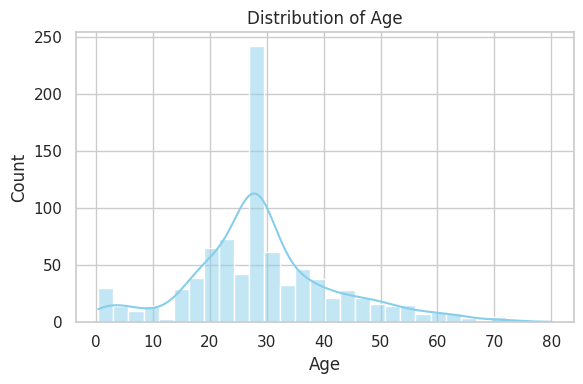

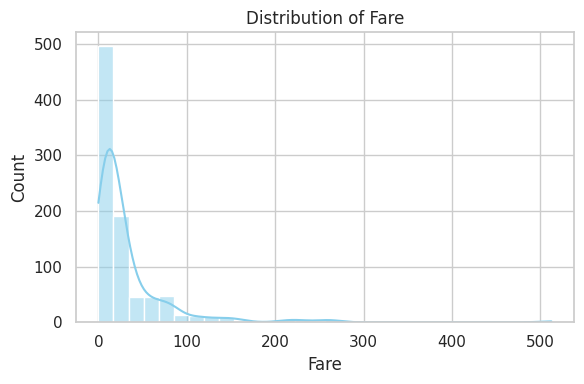

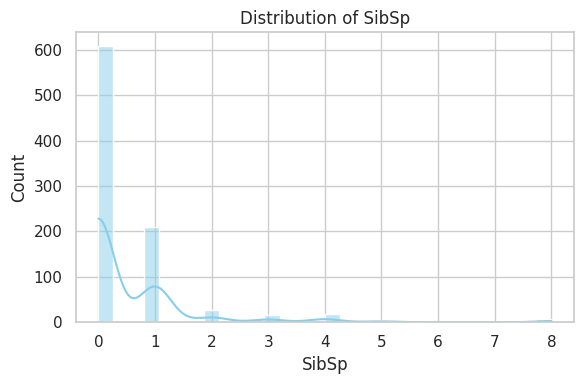

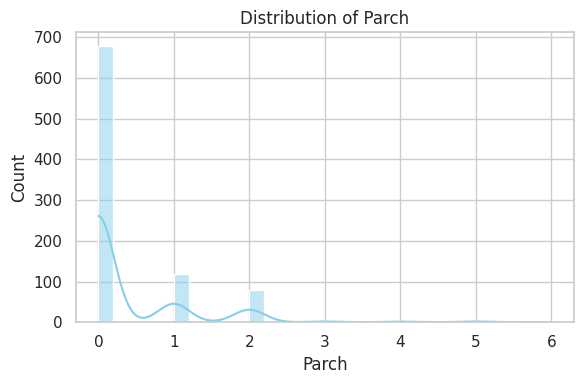

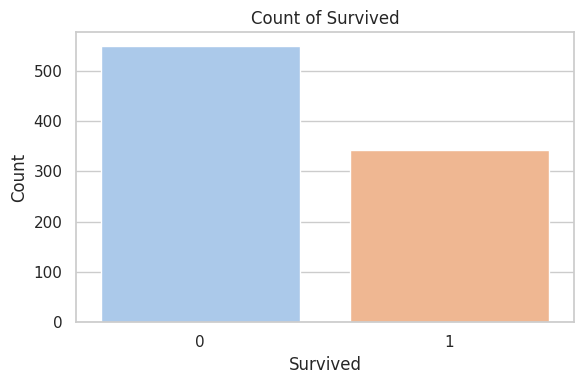

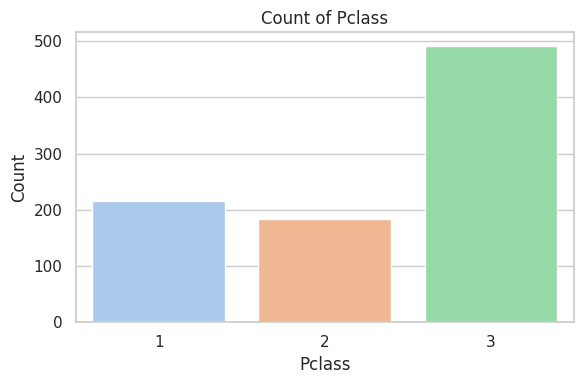

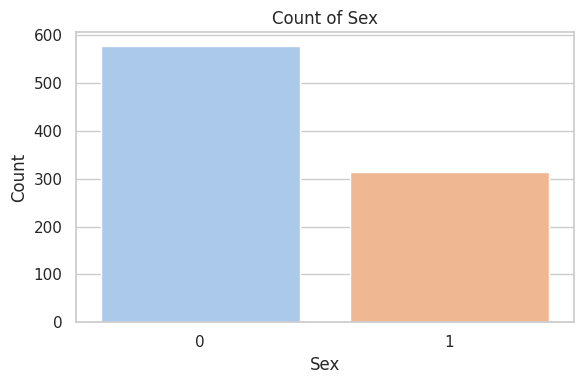

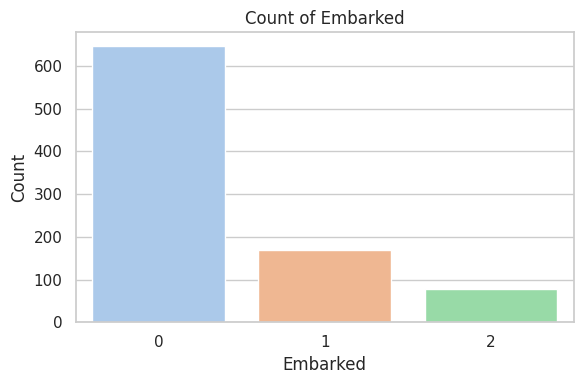

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


**Bivariate Analysis Code**

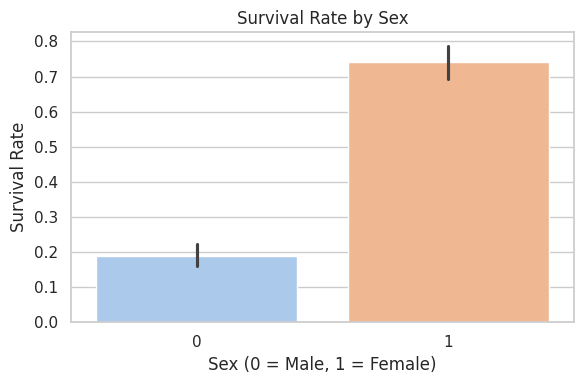

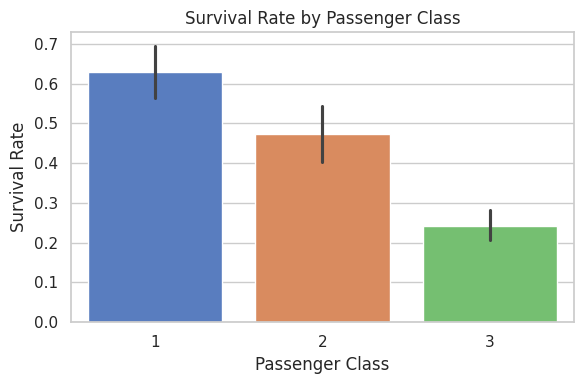

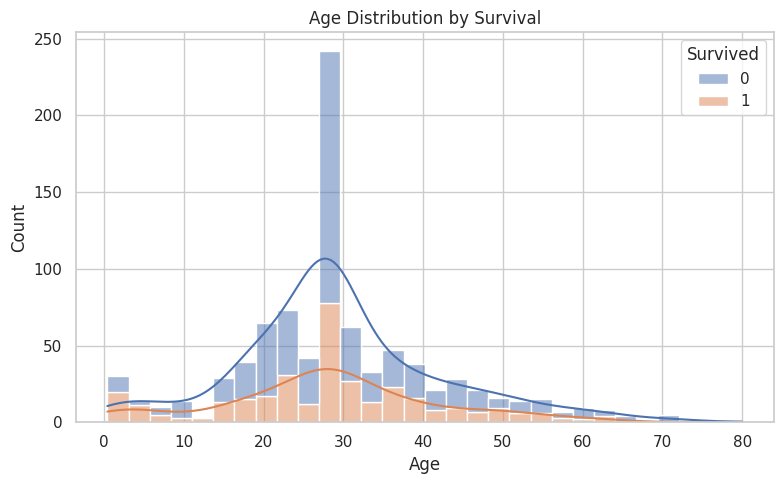

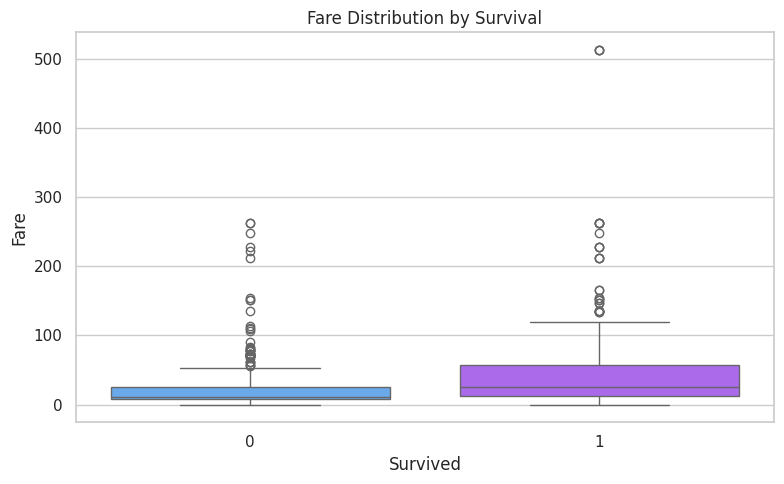

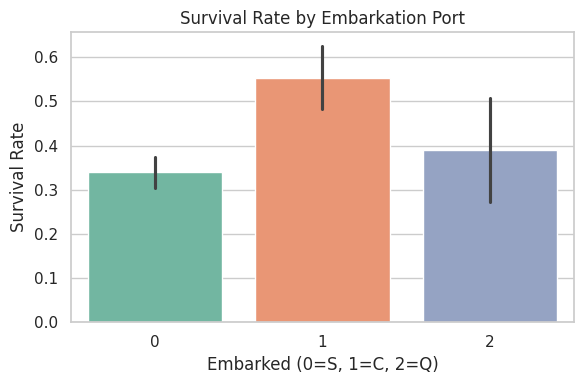

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, palette='muted')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df, palette='cool')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarked (0=S, 1=C, 2=Q)')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()


**Multivariate Analysis Code**

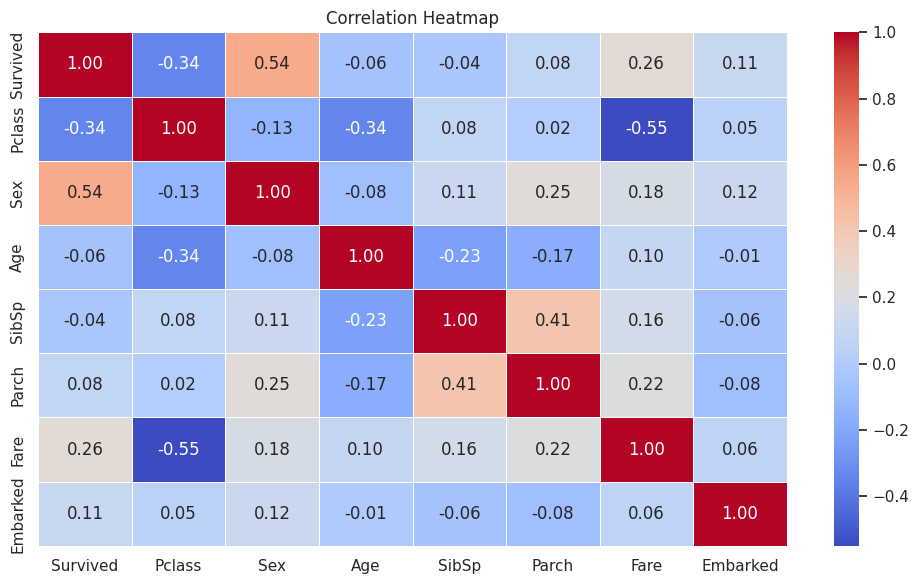

<Figure size 600x400 with 0 Axes>

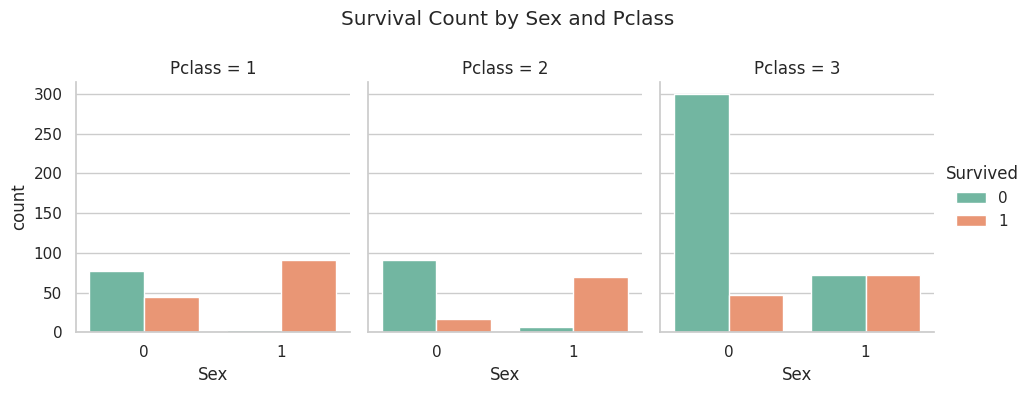

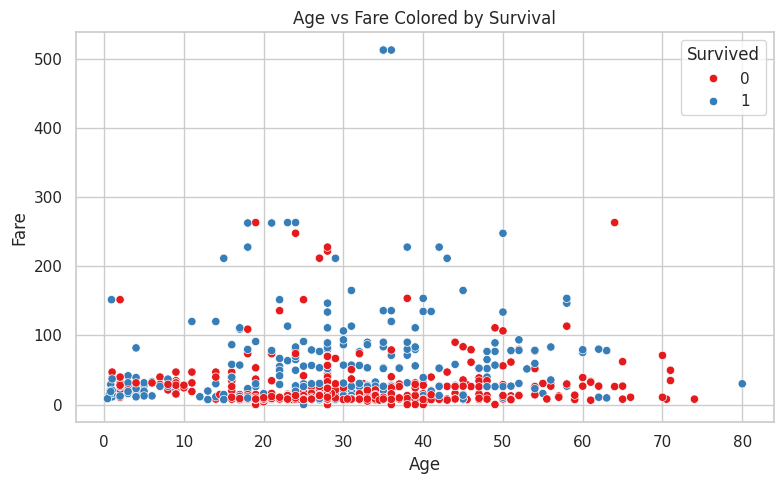

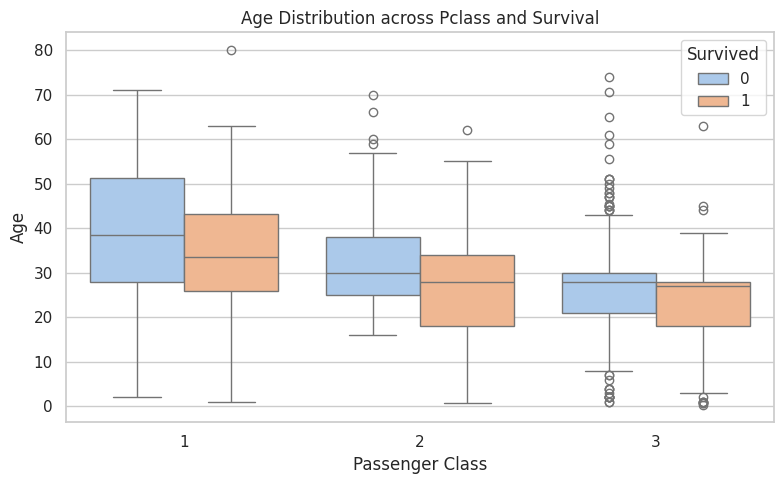

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.catplot(x='Sex', hue='Survived', col='Pclass', data=df,
            kind='count', palette='Set2', height=4, aspect=0.8)
plt.subplots_adjust(top=0.8)
plt.suptitle('Survival Count by Sex and Pclass')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='Set1')
plt.title('Age vs Fare Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df, palette='pastel')
plt.title('Age Distribution across Pclass and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


**Missing Value Analysis Code**

Missing Value Summary:

          Missing Values  Percentage (%)
Cabin                687       77.104377
Age                  177       19.865320
Embarked               2        0.224467


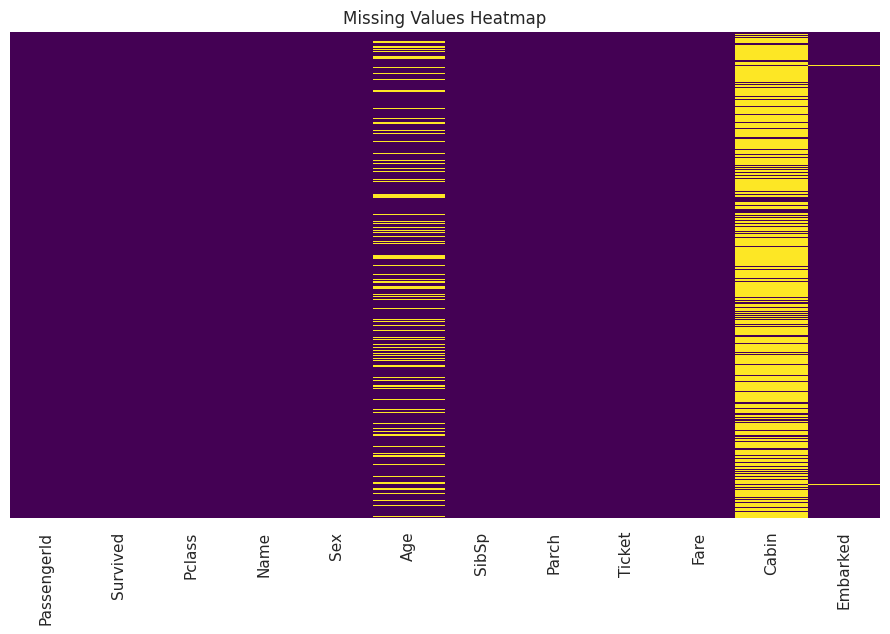

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Titanic-Dataset.csv")

missing_summary = df.isnull().sum()
missing_percent = (missing_summary / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_summary,
    'Percentage (%)': missing_percent
})

missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

print("Missing Value Summary:\n")
print(missing_df)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


**Outlier Detection Code**

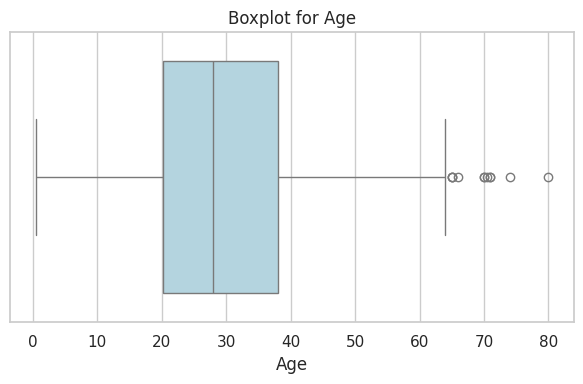

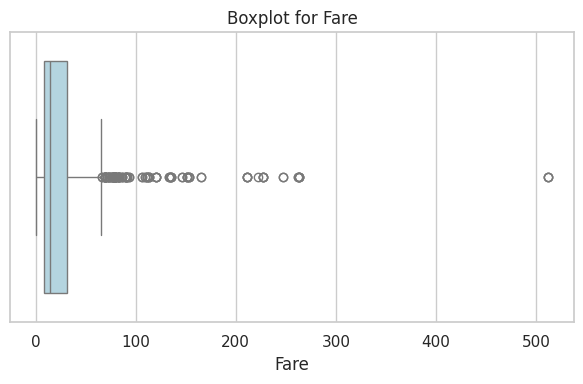

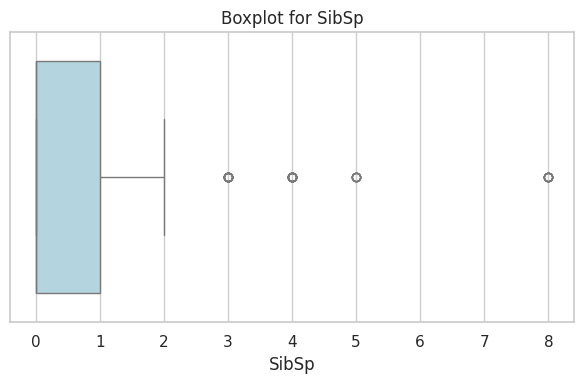

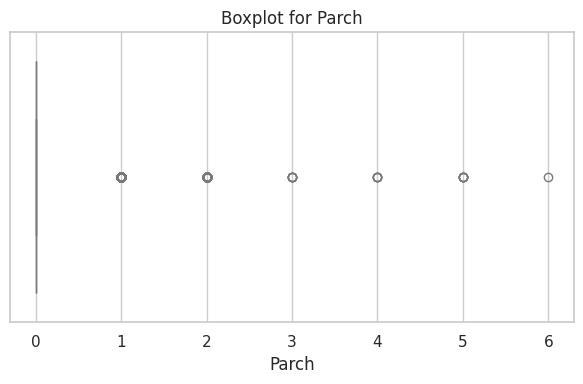


Outlier counts based on IQR method:

Age: 11 outliers
Fare: 116 outliers
SibSp: 46 outliers
Parch: 213 outliers


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

outliers = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outliers[col] = outlier_count

print("\nOutlier counts based on IQR method:\n")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")


**Correlation Matrix**

Correlation Matrix:

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


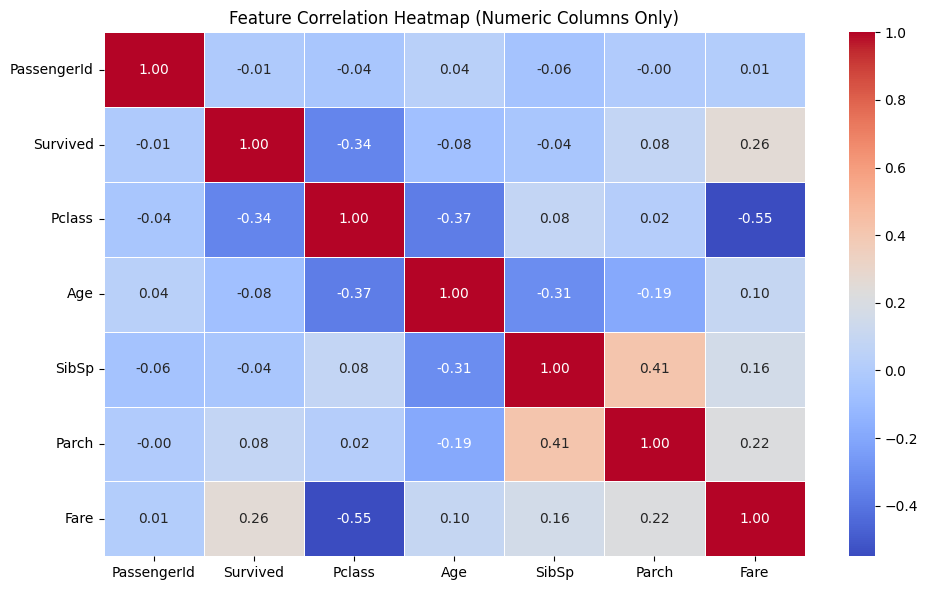

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Titanic-Dataset.csv")
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:\n")
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap (Numeric Columns Only)')
plt.tight_layout()
plt.show()


**Feature Interactions**

<Figure size 800x500 with 0 Axes>

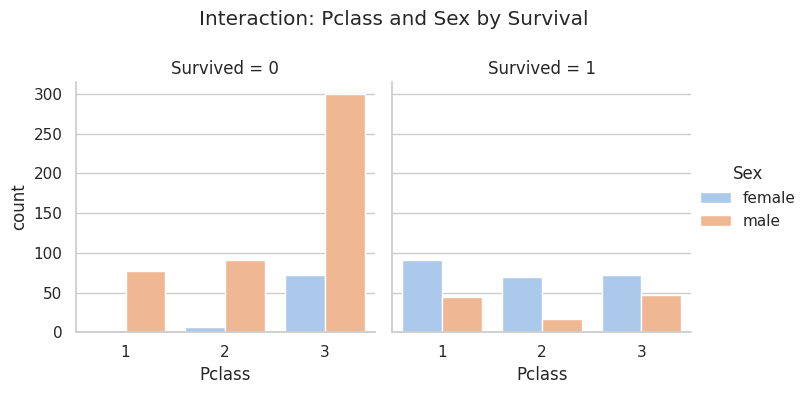

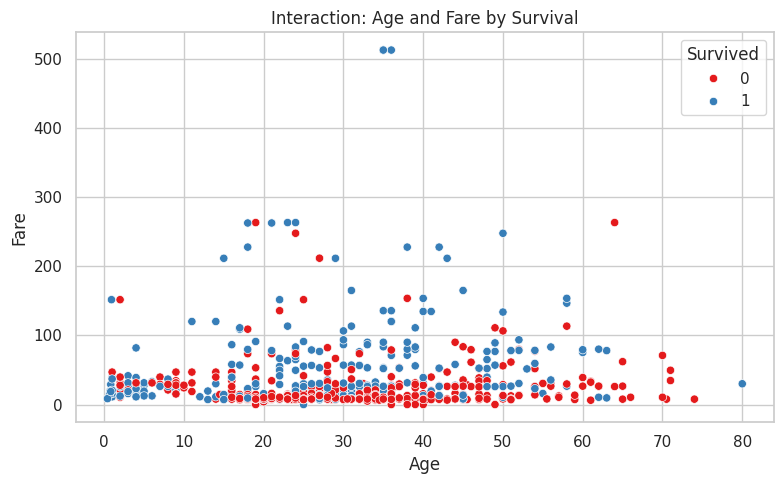

<Figure size 800x500 with 0 Axes>

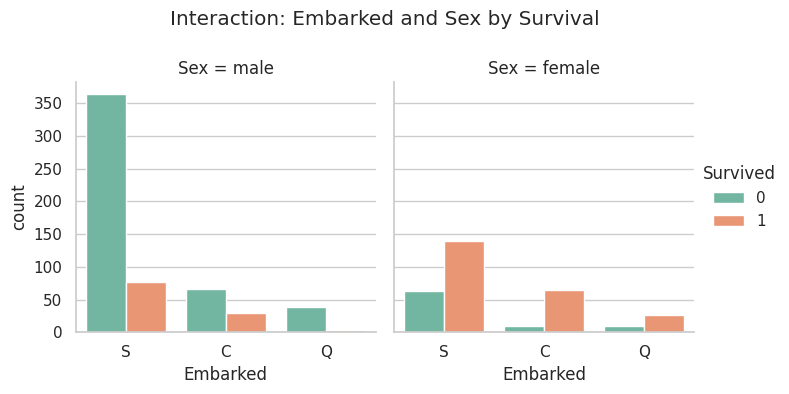

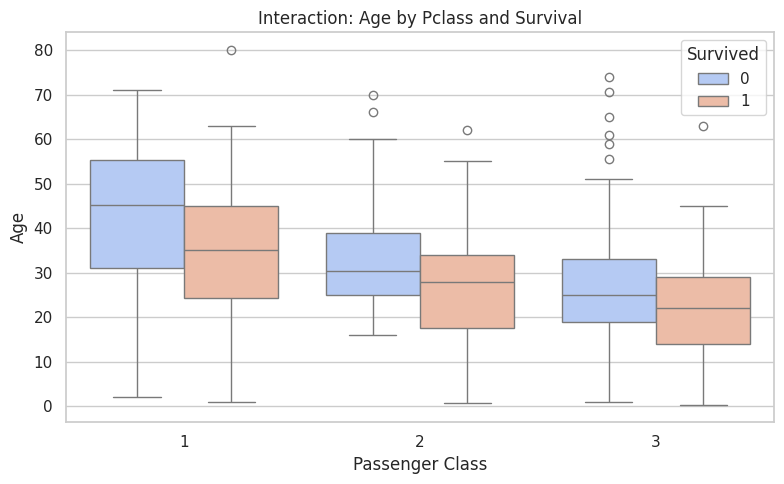

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# -----------------------------
# 1. Interaction: Sex vs Pclass vs Survival
# -----------------------------
plt.figure(figsize=(8, 5))
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=df,
            kind="count", palette="pastel", height=4, aspect=0.9)
plt.subplots_adjust(top=0.8)
plt.suptitle("Interaction: Pclass and Sex by Survival")
plt.show()

# -----------------------------
# 2. Interaction: Age vs Fare Colored by Survival
# -----------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='Set1')
plt.title("Interaction: Age and Fare by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Interaction: Embarked vs Sex vs Survival
# -----------------------------
plt.figure(figsize=(8, 5))
sns.catplot(x="Embarked", hue="Survived", col="Sex", data=df,
            kind="count", palette="Set2", height=4, aspect=0.9)
plt.subplots_adjust(top=0.8)
plt.suptitle("Interaction: Embarked and Sex by Survival")
plt.show()

# -----------------------------
# 4. Interaction: Age Distribution by Pclass and Survival
# -----------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df, palette='coolwarm')
plt.title("Interaction: Age by Pclass and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


**Family Size Feature Analysis**

<ipython-input-4-4138071536>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FamilySize', data=df, palette='pastel')


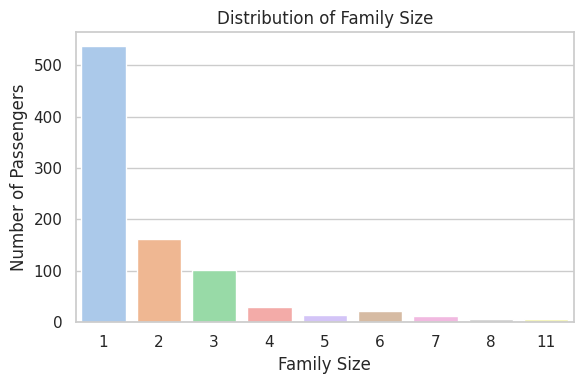

<ipython-input-4-4138071536>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, palette='muted')


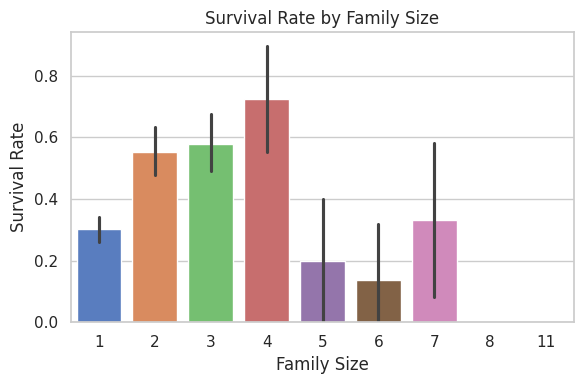

<ipython-input-4-4138071536>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FamilySize', y='Age', data=df, palette='coolwarm')


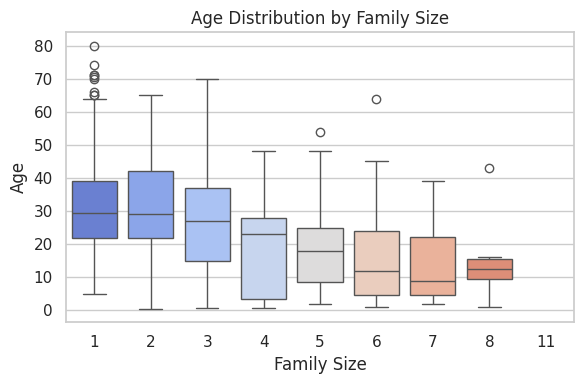

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the passenger

plt.figure(figsize=(6, 4))
sns.countplot(x='FamilySize', data=df, palette='pastel')
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='FamilySize', y='Survived', data=df, palette='muted')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='FamilySize', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


**Model Training and Accuracy**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Select Relevant Features
model_df = df.copy()

# Encode categorical columns
model_df['Sex'] = model_df['Sex'].map({'male': 0, 'female': 1})
model_df['Embarked'] = model_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Fill missing values
model_df['Age'].fillna(model_df['Age'].median(), inplace=True)
model_df['Embarked'].fillna(model_df['Embarked'].mode()[0], inplace=True)

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
X = model_df[features]
y = model_df['Survived']

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predictions and Accuracy
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



✅ Model Accuracy: 0.7989

Confusion Matrix:
[[89 16]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<ipython-input-6-707427497>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  model_df['Age'].fillna(model_df['Age'].median(), inplace=True)
<ipython-input-6-707427497>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 